# Metodo del gradiente
## Introduccion
El metodo de las ecuaciones normales se muy interesante, es analitico, pero presenta dificultades en varios cases

* Matrices muy grandes. Recuerde que toca invertir la matriz $A^T A$, o en el peor de los casos $(A^T A + \lambda I)$. Esto cuesta mucho.

* El metodo de las ecuaciones normales solo trabaja para sistemas lineales. (regresion lineal). Pero hay muchos problemas en ML (Redes Neuronales) que no son lineales y el metodo de las ecuacion normales, simplemente no functiona.

Comencemos hoy con las ecuaciones lineales $A \theta = b$
Como se pueden resolver?

* Metodos directos
    * Eliminacion Gaussiana ($A=LU$)
    * Descomposicon de Cholesky ($A=L^T L$)
    * Descomposicion $QR$. $Q$ es ortogonal y $R$ es triangular superior.
    * Cramer Rule.
* Metodos iterativos
    * Estacionarios: Se basan en la descomposicion $A=L+D+U$.
        * Jacobi
        * Gauss-Seidel
        * Over-relaxation

    * no estacionarios
        Gradientes (muchos los mencionamos ahora)
        GMRS:Generalized Minimal Residual Method.



















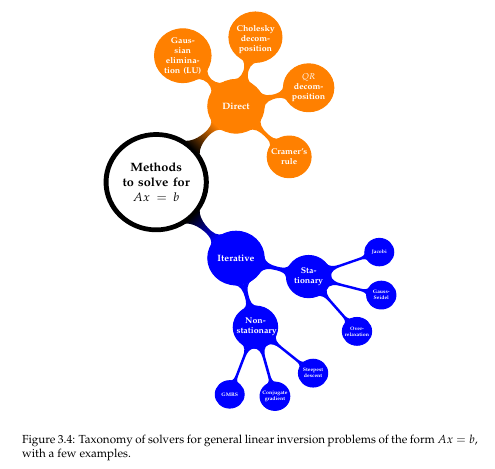

Sin embargo la mayoria de problemas no son lineales.

Hago una lista de algunos metodos son buenos para sistemas no lineales

* Metodos que no se basan en el gradiente
    * **Simulating Annealing**: Es muy bueno para encontrar minimos globales. Es lento.
    * **Genetic Algorithms**: Basados en evolucion biologica.
    * **Pattern search**: Este, como los otros arriba no usan gradiente.
    * [Particle Swarm Optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization).

* Metodos basados en el gradiente.
    * Metodos de Newton: Se basan en la expansion de la funcion (costo) en series de Taylor.

$$f(x) = f(x_0) + x_0^T \nabla f(x_0) + x_o^T H(x_0) x_0 + h.o.t $$
    Se usan en ANN. Esta los de gradiente que van solo hasta la primera derivada y otros mas avzanzados que van hasta la matriz Hessiana  $H =(f_{x_i x_j})$. Que problema tiene la Hessiana? que es enorme. Si tienes 1000 componentes la Hessiana tiene $10^6$.

* Quasi-Newton. Hacen aproximaciones a la Hessiana usando solo la diagonal. Un metodo importante aca es le L-BFGS: Limited Memory Broyden-Fletcher-Goldfarb-Shanno.

* Descenso de gradiente. Estos son los de ANN.
    * SD: Steepest Descent. Lo discutimos ahora.
    * CG: Conjugate Gradient. Tambien lo discutimos mas adelante.
    * Non-linear Conjugate Gradient (este es quasi-Newton).
    Segun la forma como se agrupan, accesan los datos
        * Batch Gradient Descent
        * Mini-batch Gradient Descent (es el mas usado en ANN)
        * Stochastic Gradient Descent SGD (lo discutimos ahora).


Todos estos metodos de gradiente sin distincion usan una funcion de costo. Por ejemplo para el caso de regresion logistica

En este curso, casi continuamente estamos construyendo dos elementos importantes

* Funcion de costo (minimizar)
* Gradiente de la funcion de costo.

Por ejemplo, en regresion lineal:

$$J = \frac12 \| X \theta - y \|^2 = \frac12 \| h(\theta, x) - y \|^2 = \frac12 \sum_{i=1}^m h(\theta, x^{(i)}) - y_i)^2 \tag{1}$$
donde la hipotesis

$$h(\theta, x) = X \theta $$
y $X$ una matriz con filas $x^{(i)}$.

El gradiente de la ecuacion (1) es:

$$\frac{\partial J}{\partial \theta_k} = \sum_{i=1}^m
(h(\theta, x^{(i)} - y_i) x_{ik} $$

Voy a describir dos algoritmos que son **famosos** pero que tiene la limitacion de trabajar con sistemas lineales.

* Steepest Descent : Descenso maximo
* Conjugate Gradient: Gradiente conjugado, **el mejor** para sistemas lineal (la funcion de costo es cuadratica. Paraboloide).


### Steepest Descent (descenso maximo).
La filosofia de este algoritmo es que el gradiente es la direccion de **maximo ascenso**. Entonces si iteramos con la ecuacion
$$\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla J(\theta^{(i)}) $$

Veamos por que el gradiente es la direccion de maximo ascenso.
De Calculo en varias variables

La derivada direccional en la direccion $u$.
$$\frac{\partial J}{\partial u} = \nabla J \cdot u $$

Ese producto interno lo podemos escribir

$$\nabla J \cdot u = \| \nabla J \| \| u \| \cos \beta  $$

El maximo valor que pueda tomar esta expresion $\beta \in [0, 2 \pi)$, es el angulo entre el gradiente y $u$. Es cuando $\cos \beta = 1$.  En este caso $\beta=0$,
La direccion del maximo cambio es a lo largo del gradiente.
El gradiente es la direccion de **maximo ascenso**.
La pregunta es que es $\alpha$? Este hiperparametro es una medida de paso. Sera posible optimizar el paso $\alpha$?
La respuesta es si, para el problema lineal. Veamos como podemos hacer esto.

Sabemos que

$$\nabla J(\theta)  = X^T(X \theta - y) $$

### Line search: algoritmo para $\alpha$ analitico
El problema que queremos resolver es, si el gradiente es 0.

$$X^T X \theta = X^T y $$
(ecuaciones normales)
Por conveniencia $A= X^T X$, $b=X^T y$. El sistema es

$$A \theta = b  $$
El gradiente de $J$ se escribe

$$\nabla J(\theta) = A \theta - b $$

Como se hace el descenso.

* Se fija $\theta_0$ para comenzar (aleatorio)
* Como llegar lo mas rapido posible a $\theta_1$?
El proximo punto es $\theta_1 = \theta_0 - \alpha \nabla J(\theta_0)$
Esto lo ponemos como un problema de optimizacion en $\alpha$.

$$\varphi(\alpha) = J [ \theta_0 - \alpha \nabla J(\theta_0)] $$
La idea es usar calculo, se toma la deriva con respecto a $\alpha$ y se iguala a cero.

$$\varphi'(\alpha) = \nabla J[ \theta_0 - \alpha \nabla J(\theta_0)] \cdot \nabla J(\theta_0)= 0 \tag{2} $$
Este resultado es interesante.
Definamos nombres que nos ayuden a interpretar la ecuacion  (2).

$$\theta_1 = \theta_0 - \alpha \nabla J(\theta_0) \tag{3}$$

$$\nabla J(\theta_1) \cdot \nabla J(\theta_0) = 0.$$

Multipliquemos (3) por $A$

$$A \theta_1 = A \theta_0 - \alpha A \nabla J(\theta_0) $$
Restamos $b$ a esta ecuacion


$$A \theta_1 - b = A \theta_0 - b - \alpha A \nabla J(\theta_0) \tag{4} $$

Definamos los residuales $r_0, r_1$

$$r_0 = A \theta_0 - b = \nabla J(\theta_0) $$
$$r_1 = A \theta_1 - b = \nabla J(\theta_1) $$

Reescribamos la ecuacion (4) con esta nueva notacion

$$ r_1 = r_0 - \alpha A \nabla J(\theta_0) = r_0 - \alpha A r_0 $$
$$ r_1 = r_0 - \alpha A r_0 \tag{5} $$

Recuerde que $r_0 \cdot r_1 = 0$.
Podemos tomar el producto por $r_0$ en la Ecuacion

$$ r_0^T r_1 = r_0^T r_0 - \alpha r_0^T A r_0  $$

$$ 0=  \| r_0 \|^2- \alpha r_0^T A r_0  $$

Despejamos $\alpha$

$$\alpha = \frac{\| r_0 \|^2}{r_0^T A r_0} $$

Con esto se puede formalizar el algoritmo de SD. Generalizando de igual forma para los demas puntos.











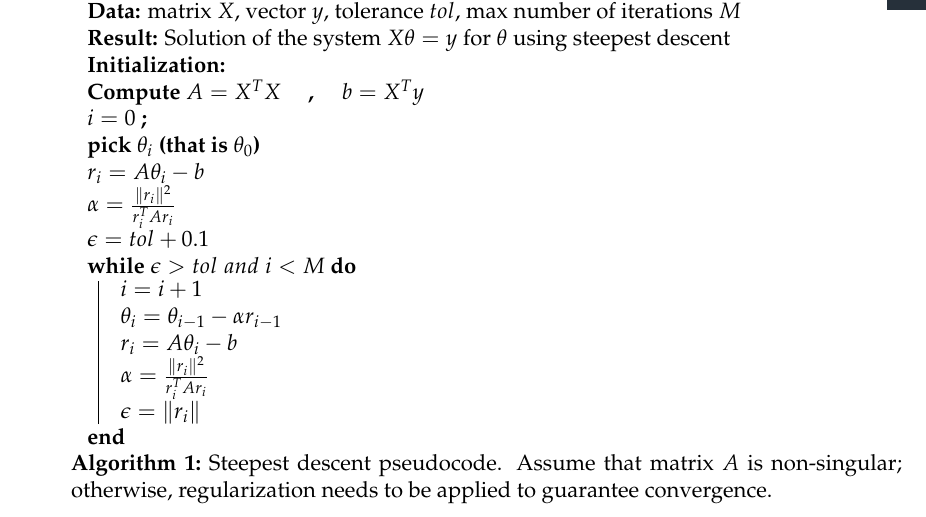

**Ejemplo 3.1.1**: Asuma la matriz $A$ y el vector $b$

$$A = X^T X = \begin{pmatrix} 10 & 0 \\ 0 & 1 \end{pmatrix} \quad , \quad b = \binom{1}{-1} $$

$$J(\theta) = \frac12 \theta^T A \theta - b^T \theta = \frac12 \theta^T X^T X \theta - y^T X \theta = 5 \theta_0^2 + \frac12 \theta_1^2 - \theta_0 + \theta_1 $$

El minimo que estima el algoritmo es $\theta=\binom{0.1000663}{-0.993374}$

$$ J(\theta) = -0.549976.$$

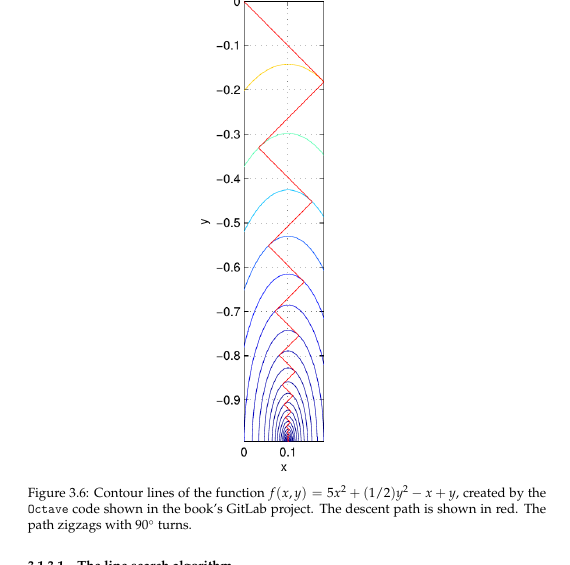

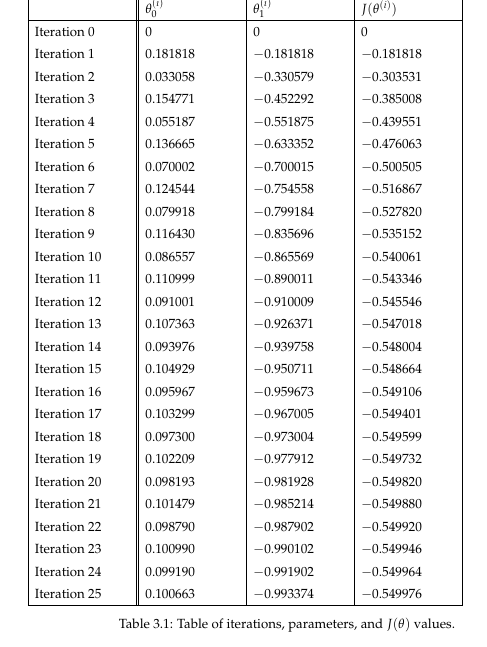

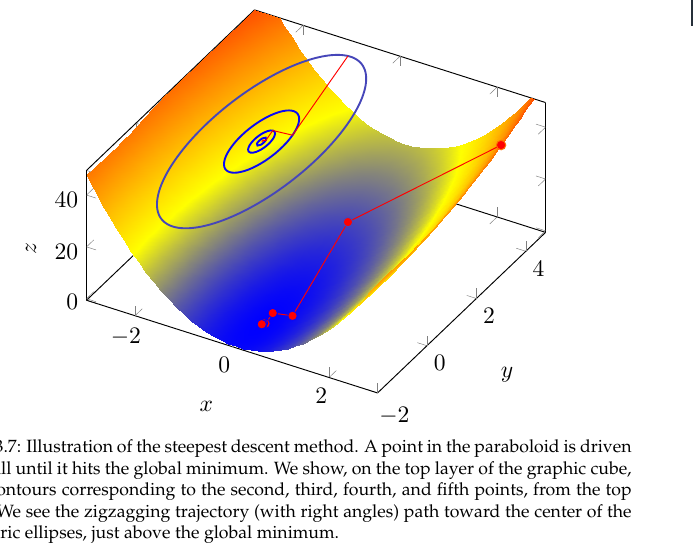

## Conjugate Gradient.

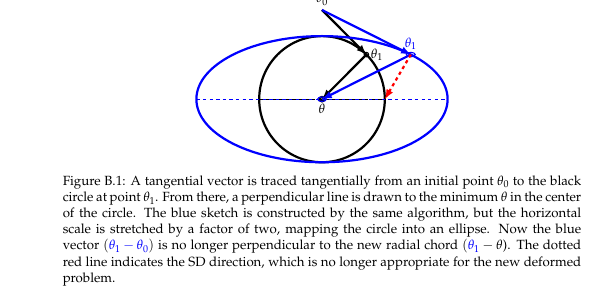

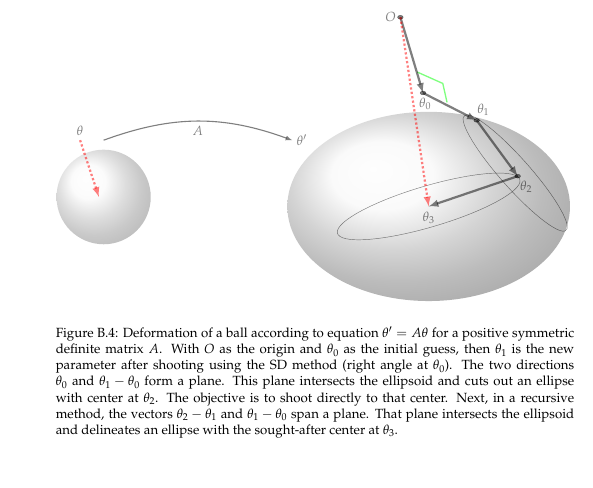

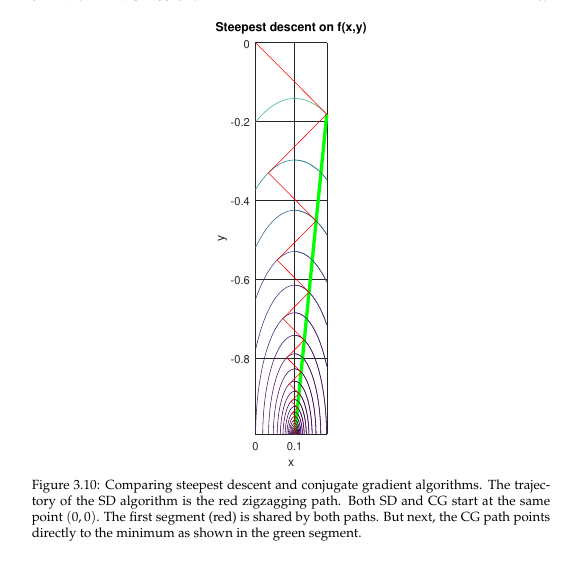

El metodo fue inventado simultaneamente por 3 persons.
Magnus Hestenes y Eduard Stiefel publicaron el
[articulo  orginal](https://nvlpubs.nist.gov/nistpubs/jres/049/jresv49n6p409_A1b.pdf) en 1952. De otro lado Cornelius Lanczoz tambien descubrio el algoritmo.


Luego de todas esas figuras que ilustran la idea de CG (Gradiente Conjugado). Hagamos un poco de algebral.

La idea del gradiente conjugado es extender la idea de ortogonalidad. Se dice que $u,v$ son $A$-ortogonales
si
$$ u^T A v = 0 $$
Si $A=\lambda I$, la ortogonalidad de $u,v$ es la clasica.

$$\langle A, v \rangle = \langle u, A v \rangle = 0. $$


El mundo esta lejos de ser lineal.  El CG es ideal pero para problemas lineales (con funcion de costo cuadraticos). Pero que pasa si la funcion de costo no es cuadratica.



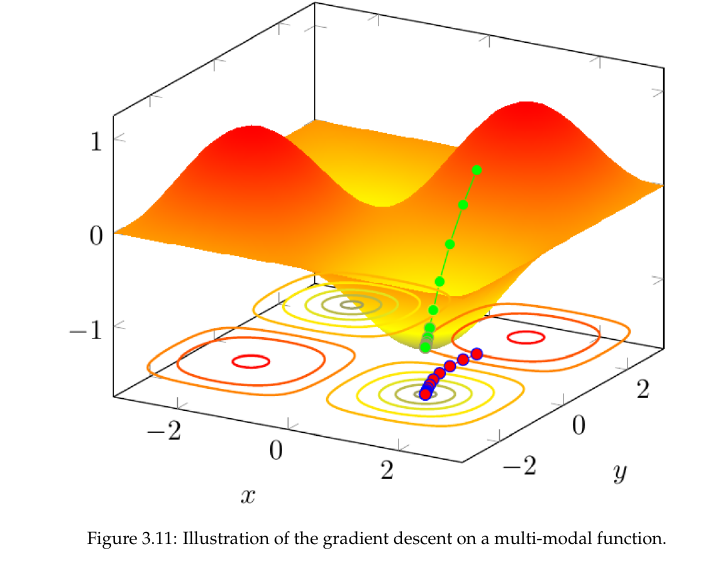

Cuando las superficies de costo no son cuadraticas bajamos con

$$\theta^{(i+1)}  = \theta^{(i)} - \alpha \nabla J(\theta^{(i)}) $$
donde $\alpha$ esta por determinarse:
Algunos metodos son:

* Calcule $\alpha$ en tres puntos distinos, luego haga una interpolacion parabolica. Encuentre el minimo de la parabola. Ese debe ser el $\alpha$ (optimo).

* Prueba y error. Comience con $\alpha$ pequenho, i.e. $\alpha = 10^{-4}$, y empiece a hacer mas grande controlando que el sistema converja.

* Backtracking. Se adivina un $\alpha$ grande ($\alpha=1$)
y se reduce el paso poco a poco. En `Matlab` el algoritmo tiene el nombre de `so_step_armijo`. Por el articulo de Larry Armijo. Referencia en las notas de clase.

En curso de DL (Deep Learning) ensenho otras tecnicas para acelerar la convergencia (gradient accelerators)

* Momentum (Polya, Ruso)
* Nesterov (alumno de Polya, Ruso)
* Adam (Adaptive Momentum)
* AdaGrad (Adaptive Gradient)
* RMSprop (Jeffrye Hinton)



Algoritmo para el descenso con gradiente y $\alpha$ fijo.

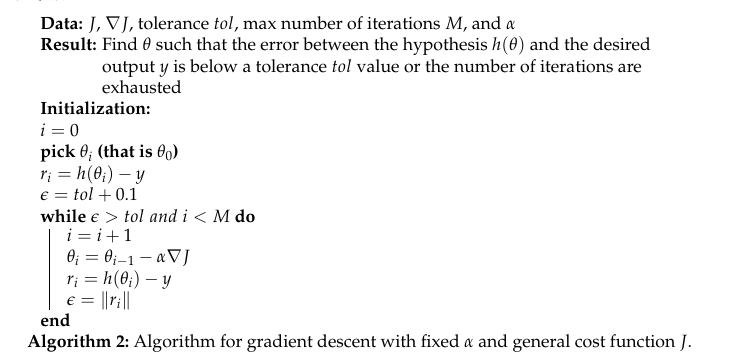

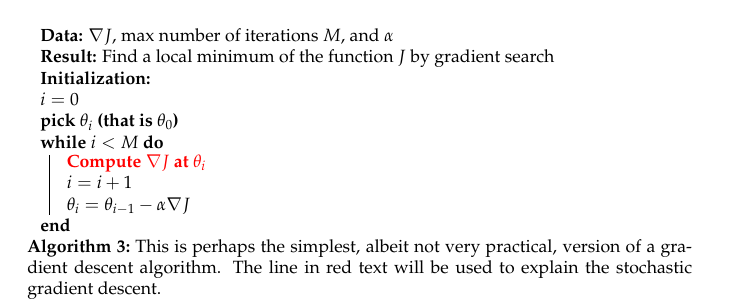

Los algoritmos 2 y 3 son ejemplos de Batch Gradient Descent.
Se usan **todos** los datos.

Vamos a estudiar otros dos casos:
* SGD: Stochastic Gradient Descent
* Minibatch Gradient Descent.

## SGD: Stochastic Gradient Descent.
La clave de este algoritmo esta en la linea roja del Algoritmo 3.
En vez de calcular el gradiente en todos los datos, se calcula solo en uno, pero este debe ser aleatorio.



### Motivacion:
* Piense en una red neuronal con 10 capas ocultas.
* La entrada consiste en 10000 imagenes cada una de $100 \times 100$ pixeles. Piense que son en gris (en RGB le toca multiplicar por 3).
* Cada capa tiene en promedio 100 neuronas.

Del segundo numeral: $10000 \times 100 \times 100=10^8$ floats.
Los pesos (que es lo que va en las conexiones y esos son los $\theta$, serian

$$10^8 \times 100^{10} = 10^{28}  $$
Estos serian los pesos. La linea roja del Algoritmo 3 es un cuello de botella. Como podemos acelerar el proceso.

Veamos como podemos simplificar el proceso.
Para esto vamos a escribir las funcioes de costo como suma de funciones de costo sobre los datos. De esta suma, elegimos un solo termino de forma aleatoria. Mas adelante (hoy o en la proxima clase) explico por que esto funciona.

* **Minimos cuadrados regulares**: Recuerde

$$J(x, A, y) = \frac12 \| A x - y \|^2 =
\frac12 \sum_{i=1}^m \left ( \sum_{j=1}^n (a_{ij} x_j - y_i \right )^2 $$
La funcion de costo **global** es la suma de muchas funciones de costo **locales** ($C_i(x, A, y)$)

$$C_i(x, A, y) = \frac{m}{2} \left ( \sum_{i=1}^n a_{ij} x_j - y_i   \right )^2 $$

Con esta notacion podemos escribir la funcion de costo global como

$$J(x, A, y) = \frac{1}{m} \sum_{i=1}^m C_i(x, A, y)  $$

* **Regresion Logistica**: Proximamente estare mostrando que la funcion de costo para la regresion logistica

$$J(\theta, x, y) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)}] + (1 - y) \log [ 1 - h(\theta, x^{(i)}] $$

Asi como hicimos arriba, podemos definir una funcion de costo auxiliar (local)

$$C_i(x, \theta, y) = - \left [ y_i \log [ h(\theta, x^{(i)}] + (1 - y) \log [ 1 - h(\theta, x^{(i)}] \right ] $$

Con esto es directo ver que

$$J(\theta, x, y) = \frac1m \sum_{i=1}^m C_i(x, \theta, y) $$

El SGD solo toma una de las $m$ muestras $x_i$ para calcular el gradiente. Lo que sigue de clase es para convencerlos de que este metodo funciona. Comencemos con una grafica.

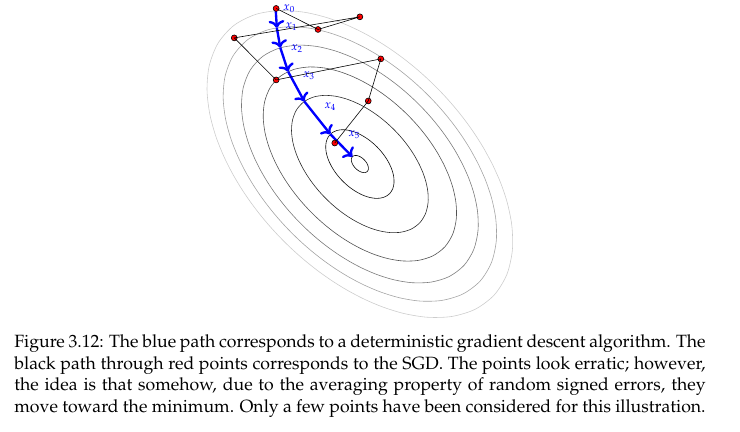

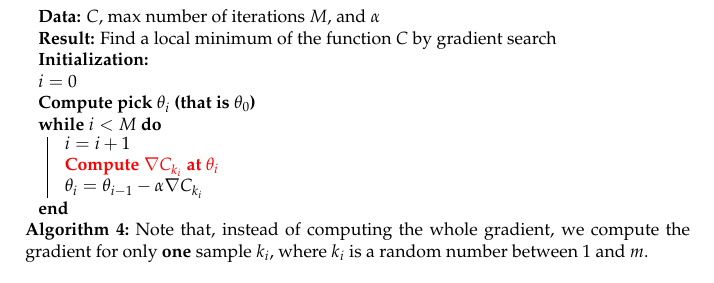

Justificacion del algoritmo.
Piense en simple problema de regresion lineal donde queremos ajustar 5 puntos a una recta $y=\theta x$ (note que pasa por el origen, para no complicarme la vida). Los puntos son
$$
(x_1, y_1),
(x_2, y_2),
(x_3, y_3),
(x_4, y_4),
(x_5, y_5),
$$
Las ecaucion de de regresion son

$$
y_1 = \theta x_1 \\
y_2 = \theta x_2 \\
y_3 = \theta x_3 \\
y_4 = \theta x_4 \\
y_5 = \theta x_5 \\
$$

Poco probable que halla una recta que los contenga a todos.

Definimos la funcion de costo (minimos cuadrados)

$$J(\theta) = \frac15 \sum_{i=1}^5 ( \theta x_i - y_i)^2 $$

Podemos definir las funciones de costo local

$$C_i(\theta) = (\theta x_i - y_i)^2 $$

El gradiente de $J$

$$\nabla J(\theta) = \frac{dJ}{d \theta} = \frac25 \sum_{i=1}^5 ( \theta x_i - y_i) x_i. $$

$$\nabla C_i(\theta) = \frac{dC}{d \theta} = 2 x_i(\theta x_i -y_i) $$

Es claro que el gradiente global es el promedio de los gradientes locales.


$$\nabla J(\theta ) = \frac15 \sum_{i=1}^5 \nabla C_i(\theta) $$

Cada funcion de costo $C_i(\theta)$ es una parabola

$$(\theta x_i - y_i)^2 = x_i^2 \theta^2 - 2 \theta x_i y_i + y_i^2$ $$

No voy a dibujar los puntos y la linea. Pero voy a hacer un analisis mas detallado.

Los puntos son:

$$(-1, -0.5), (1, 1), (3, 2), (4, 3), (5, 6) $$

Funciones de costo locales

$$C_1(\theta) = (-\theta + 0.5)^2 \quad , \text{minimo  at } \theta=0.5$$
$$C_2(\theta) = (\theta -1)^2 \quad , \quad \text{minimo at } \theta =1 $$
$$C_3(\theta) = (3 \theta -2)^2 \quad , \quad \text{minimo at } \theta =0.667 $$
$$C_4(\theta) = (4 \theta -3)^2 \quad , \quad \text{minimo at } \theta =0.75 $$
$$C_5(\theta) = (5 \theta -6)^2 \quad , \quad \text{minimo at } \theta =1.2 $$

$$\nabla J(\theta)  = \frac15 [-2(-\theta + 0.5) + 2(\theta-1) + 6(3 \theta -2) + 8 (4 \theta -3) + 10 (5 \theta -6) $$

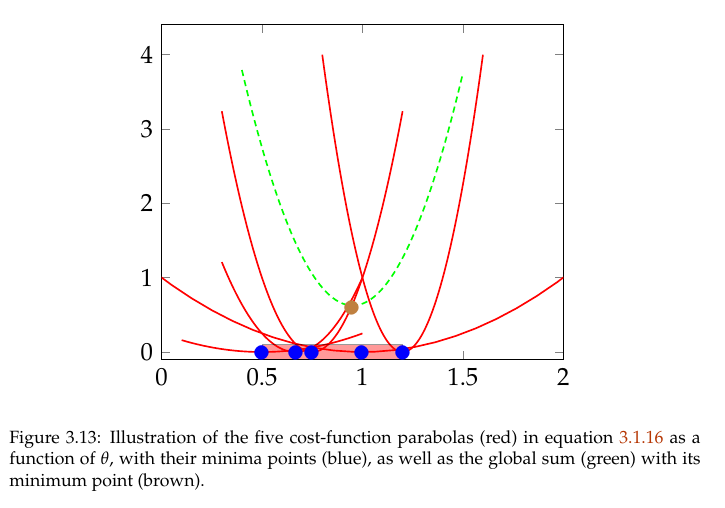

La zona de banda roja entre $[0.5, 1.2]$ se llama **zona de confusion**.

El mas pequenho de los minimos es $m$
El mas grande de los minimos es $M$

Si $\theta < m$ con seguridad *el gradiente global** es negativo y su negativo apunta a la derecha (donde esta el minimo global) punto cafe en la curva verde.

Si $\theta > M$ con seguridad *el gradiente global** es postivo y su negativo apunta a la izquierda (donde esta el minimo global).

La zona $[m, M]$ se llama **zona de confusion**?

Que pasa si ya estamos en la zona de confusion?

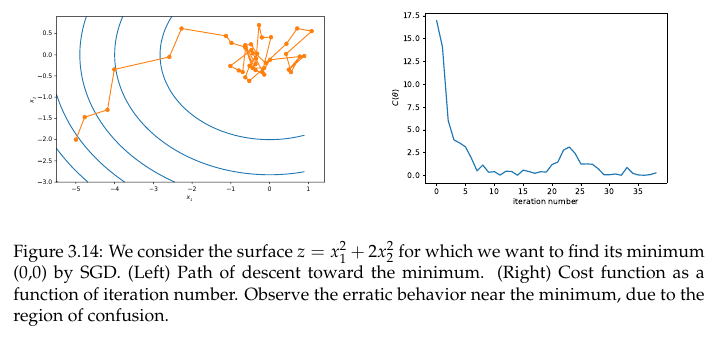

Proxima clase acabamos con el cuento del gradiente. Y vamos a regresion mulit-parametro.